In [181]:
# 기상 변수 추가 테스트
options(warn = -1) ## 경고 지우기
options(repr.plot.width=8, repr.plot.height=6) # 플랏 크기 조절
Sys.setlocale(category = "LC_ALL", locale = "ko_KR.UTF-8") # 한글 설정

[1] "ko_KR.UTF-8/ko_KR.UTF-8/ko_KR.UTF-8/C/ko_KR.UTF-8/C"

## 기상청_농업기상관측자료 사용
농업에 필요한 요소 데이터를 관측소에서 가까운 지역으로 설정 하여 테스트
/ 농업기상관측자료는 전국 11곳에서 제공됨
##### 평균값 사용: 습도, 토양수분, 기온, 지면온도, 지중온도
###### 출처: https://data.kma.go.kr/data/grnd/selectAgrRltmList.do?pgmNo=72

In [4]:
# 파일 읽기
weatherInfo <- read.csv("../OBS_AAOS_DD_20240414101344.csv", fileEncoding ="EUC-KR")
head(weatherInfo)

,지점,지점명,일시,X0.5M.평균.습도...,X1.5M.평균.습도...,X4.0M.평균.습도...,X10CM.일.토양수분...,X20CM.일.토양수분...,X30CM.일.토양수분...,X50CM.일.토양수분...,...,X0.5M.일.지중온도..C.,X1.0M.일.지중온도..C.,X1.5M.일.지중온도..C.,X3.0M.일.지중온도..C.,X5.0M.일.지중온도..C.,일.순복사.MJ.m2.,일.전천복사.MJ.m2.,일.반사복사.MJ.m2.,일.평균.조도.10lux.,일.지하수위.cm.
,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,119,수원(농),2023-03-01,NA,56,NA,13,10,15,5,...,4.4,4.8,5.8,9.7,14.3,NA,NA,NA,NA,0
2,119,수원(농),2023-03-02,NA,39,NA,13,10,15,5,...,4.4,5.0,5.9,9.6,14.2,NA,NA,NA,NA,NA
3,119,수원(농),2023-03-03,NA,66,NA,13,9,15,5,...,4.1,5.1,5.9,9.6,14.2,NA,NA,NA,NA,NA
4,119,수원(농),2023-03-04,NA,70,NA,13,9,14,5,...,4.6,5.1,5.9,9.6,14.2,NA,NA,NA,NA,NA
5,119,수원(농),2023-03-05,NA,66,NA,13,10,15,6,...,5.2,5.3,5.9,9.5,14.1,NA,NA,NA,NA,NA
6,119,수원(농),2023-03-06,NA,50,NA,13,10,15,6,...,5.4,5.5,6.0,9.5,14.1,NA,NA,NA,NA,NA


In [5]:
uniqueArea <- unique(weatherInfo$지점명)
uniqueArea

[1] "수원(농)"   "서산(농)"   "보성군(농)" "익산"       "철원장흥"  
 [6] "안동옥동"   "화순능주"   "대곡"       "오창가곡"   "춘천신북"  
[11] "강정"

In [6]:
#필요 데이터 추출
weatherInfo_rev1 <- weatherInfo[c(1:3,5,7,14,18,22)]
head(weatherInfo_rev1)

,지점,지점명,일시,X1.5M.평균.습도...,X10CM.일.토양수분...,X1.5M.평균.기온..C.,평균.지면온도..C.,X0.5M.일.지중온도..C.
,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,119,수원(농),2023-03-01,56,13,5.6,5.7,4.4
2,119,수원(농),2023-03-02,39,13,1.5,3.9,4.4
3,119,수원(농),2023-03-03,66,13,3.4,5.5,4.1
4,119,수원(농),2023-03-04,70,13,6.6,9.2,4.6
5,119,수원(농),2023-03-05,66,13,6.0,8.4,5.2
6,119,수원(농),2023-03-06,50,13,7.0,8.5,5.4


In [7]:
summary(weatherInfo_rev1)

      지점          지점명              일시           X1.5M.평균.습도...
 Min.   :119.0   Length:2549        Length:2549        Min.   : 20.00    
 1st Qu.:258.0   Class :character   Class :character   1st Qu.: 66.00    
 Median :972.0   Mode  :character   Mode  :character   Median : 77.00    
 Mean   :727.8                                         Mean   : 75.06    
 3rd Qu.:977.0                                         3rd Qu.: 86.00    
 Max.   :980.0                                         Max.   :100.00    
                                                       NA's   :20        
 X10CM.일.토양수분... X1.5M.평균.기온..C. 평균.지면온도..C.
 Min.   : 0.0         Min.   :-0.1        Min.   : 1.20    
 1st Qu.:14.0         1st Qu.:14.2        1st Qu.:16.40    
 Median :21.0         Median :20.4        Median :23.05    
 Mean   :23.0         Mean   :19.2        Mean   :21.73    
 3rd Qu.:29.5         3rd Qu.:24.7        3rd Qu.:27.20    
 Max.   :72.0         Max.   :30.9        Max.   :45.10    
 NA's   :102  

In [8]:
str(weatherInfo_rev1)

'data.frame':	2549 obs. of  8 variables:
 $ 지점                 : int  119 119 119 119 119 119 119 119 119 119 ...
 $ 지점명               : chr  "수원(농)" "수원(농)" "수원(농)" "수원(농)" ...
 $ 일시                 : chr  "2023-03-01" "2023-03-02" "2023-03-03" "2023-03-04" ...
 $ X1.5M.평균.습도...   : int  56 39 66 70 66 50 63 68 80 61 ...
 $ X10CM.일.토양수분... : int  13 13 13 13 13 13 13 13 13 13 ...
 $ X1.5M.평균.기온..C.  : num  5.6 1.5 3.4 6.6 6 7 10.3 11.1 10.5 12.1 ...
 $ 평균.지면온도..C.    : num  5.7 3.9 5.5 9.2 8.4 8.5 11.2 9.6 12.7 12.8 ...
 $ X0.5M.일.지중온도..C.: num  4.4 4.4 4.1 4.6 5.2 5.4 5.9 6.6 7.3 7.5 ...


In [11]:
#'일시'열에서 1번부터 7번까지의 값을 추출하여 연간 열에 대입한다.
weatherInfo_rev1$연간 <- substr(weatherInfo_rev1$일시,1,4)
head(weatherInfo_rev1)

,지점,지점명,일시,X1.5M.평균.습도...,X10CM.일.토양수분...,X1.5M.평균.기온..C.,평균.지면온도..C.,X0.5M.일.지중온도..C.,월간,연간
,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,119,수원(농),2023-03-01,56,13,5.6,5.7,4.4,2023-03,2023
2,119,수원(농),2023-03-02,39,13,1.5,3.9,4.4,2023-03,2023
3,119,수원(농),2023-03-03,66,13,3.4,5.5,4.1,2023-03,2023
4,119,수원(농),2023-03-04,70,13,6.6,9.2,4.6,2023-03,2023
5,119,수원(농),2023-03-05,66,13,6.0,8.4,5.2,2023-03,2023
6,119,수원(농),2023-03-06,50,13,7.0,8.5,5.4,2023-03,2023


In [10]:
library(dplyr)


다음의 패키지를 부착합니다: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [13]:
# 지점명과 연간으로 각 열의 평균을 계산. 
#일시는 숫자형이 아니므로 numeric 만 평균 계산
# na값은 제외
resultMean <- weatherInfo_rev1 %>%
group_by(지점명,연간) %>%
summarise_if(is.numeric,mean, na.rm =TRUE)

resultMean

지점명,연간,지점,X1.5M.평균.습도...,X10CM.일.토양수분...,X1.5M.평균.기온..C.,평균.지면온도..C.,X0.5M.일.지중온도..C.
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
강정,2023,980,75.75536,12.13248,20.40739,22.37897,22.34274
대곡,2023,974,78.65948,11.70513,19.49177,21.62888,21.44274
보성군(농),2023,258,79.02586,33.21368,20.01422,21.08922,18.62778
서산(농),2023,129,73.61373,21.37179,18.99258,21.96738,19.82137
수원(농),2023,119,70.23707,25.55983,19.37284,22.22328,19.80128
안동옥동,2023,972,75.00000,49.58673,18.86524,21.89957,20.01624
오창가곡,2023,977,75.90517,20.08155,19.66595,22.56466,20.10773
익산,2023,702,70.80786,19.38627,19.56245,20.20437,19.51459
철원장흥,2023,970,76.00429,24.03419,17.54655,NaN,NaN


In [17]:
resultMean_rev1 <- resultMean %>%
filter(지점명 != "철원장흥")

resultMean_rev1

지점명,연간,지점,X1.5M.평균.습도...,X10CM.일.토양수분...,X1.5M.평균.기온..C.,평균.지면온도..C.,X0.5M.일.지중온도..C.
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
강정,2023,980,75.75536,12.13248,20.40739,22.37897,22.34274
대곡,2023,974,78.65948,11.70513,19.49177,21.62888,21.44274
보성군(농),2023,258,79.02586,33.21368,20.01422,21.08922,18.62778
서산(농),2023,129,73.61373,21.37179,18.99258,21.96738,19.82137
수원(농),2023,119,70.23707,25.55983,19.37284,22.22328,19.80128
안동옥동,2023,972,75.00000,49.58673,18.86524,21.89957,20.01624
오창가곡,2023,977,75.90517,20.08155,19.66595,22.56466,20.10773
익산,2023,702,70.80786,19.38627,19.56245,20.20437,19.51459
춘천신북,2023,978,71.83190,13.98837,18.55371,21.84267,19.44807


In [147]:
b <- read.csv("Data/농림축산식품부+국립농산물품질관리원+농산물우수관리(GAP)+인증농가+현황_20240318.csv", fileEncoding ="EUC-KR")

In [ ]:
subset(b,b$품목 == '배추')

In [ ]:
소재지배추재배면적 <- subset(b,b$품목 == '배추')
head(소재지배추재배면적)

In [150]:
시도별배추생산량2024<-read.csv("Data/채소생산량_엽채류__20240412163507.csv", header=T,skip=1)

In [151]:
table(소재지배추재배면적$소재지)


 강원특별자치도 영월군  강원특별자치도 평창군 경기도 고양시 일산서구 
                    96                      3                    111 
         경기도 광명시          경기도 부천시   경기도 안산시 상록구 
                    80                      1                      5 
  경기도 용인시 처인구        경상북도 경주시        경상북도 영덕군 
                    73                     45                    111 
       경상북도 영양군   경상북도 포항시 북구      대전광역시 유성구 
                     8                     72                     49 
       전라남도 강진군        전라남도 곡성군        전라남도 구례군 
                    48                     26                     14 
       전라남도 나주시        전라남도 진도군        전라남도 해남군 
                    44                    139                   1305 
 전북특별자치도 김제시  전북특별자치도 익산시        충청남도 부여군 
                    34                     11                     16 
       충청북도 제천시        충청북도 진천군        충청북도 충주시 
                     6                    112                    113 

In [29]:
#install.packages("stringr")
library(stringr)

‘/Users/kitaewoo/Library/R/arm64/4.3/library’의 위치에 패키지(들)을 설치합니다.
(왜냐하면 ‘lib’가 지정되지 않았기 때문입니다)




다운로드된 바이너리 패키지들은 다음의 위치에 있습니다
	/var/folders/bd/wnl67tc977gbyph9dp_355vr0000gn/T//RtmpyJRMKi/downloaded_packages


In [ ]:
head(시도별배추생산량2024)
head(소재지배추재배면적)

In [153]:
colnames_소재지<-str_split_i(소재지배추재배면적$소재지," ",1);
#소재지배추재배면적$시도 <- colnames_소재지

In [154]:
시도별배추생산량2024$시도별 <- c('서울특별시','부산광역시','대구광역시','인천광역시','광주광역시','대전광역시','울산광역시','세종특별자치시','경기도','강원특별자치도','충청북도','충청남도','전북특별자치도','전라남도','경상북도','경상남도','제주도')

In [ ]:
시도별배추생산량2024

In [156]:
소재지배추재배면적$시도별 <- str_split_i(소재지배추재배면적$소재지, " ", 1)

In [157]:
for( i in 1:nrow(소재지배추재배면적)){
    for( j in 1:nrow(시도별배추생산량2024)){
        if(소재지배추재배면적$시도별[i] == 시도별배추생산량2024$시도별[j]){
            
            소재지배추재배면적$시도전체면적[i]  <- 시도별배추생산량2024[,2][j]
            소재지배추재배면적$시도전채생산량[i]  <- 시도별배추생산량2024[,4][j]
        }
    }
}

In [158]:
str(소재지배추재배면적)

'data.frame':	2522 obs. of  8 variables:
 $ 인증번호      : int  1009653 1009653 1009653 1009653 1009653 1009653 1009653 1009653 1009653 1009653 ...
 $ 소재지        : chr  "전라남도 진도군" "전라남도 진도군" "전라남도 진도군" "전라남도 진도군" ...
 $ 품목          : chr  "배추" "배추" "배추" "배추" ...
 $ 재배면적...   : num  578 725 1959 204 2354 ...
 $ 생산계획량.톤.: num  5.08 6.37 17.22 1.79 20.69 ...
 $ 시도별        : chr  "전라남도" "전라남도" "전라남도" "전라남도" ...
 $ 시도전체면적  : int  3100 3100 3100 3100 3100 3100 3100 3100 3100 3100 ...
 $ 시도전채생산량: int  359598 359598 359598 359598 359598 359598 359598 359598 359598 359598 ...


In [159]:
소재지배추재배면적$소재지생산량 <- (소재지배추재배면적$재배면적...)/ ((소재지배추재배면적$시도전체면적*10000)) * (소재지배추재배면적$시도전채생산량)

# 인증번호	소재지	품목	재배면적...(m^2)	생산계획량.톤.	시도별	시도전체면적(ha)	시도전채생산량(톤)	소재지생산량(톤)
colnames(소재지배추재배면적) <- c('인증번호','소재지','품목','재배면적(m^2)','생산계획량(톤)','시도별','시도전체면적(ha)','시도전채생산량(톤)','소재지생산량(톤)')

# 행 이름 정리
rownames(소재지배추재배면적) <- c()

In [160]:
unique(소재지배추재배면적$소재지)

[1] "전라남도 진도군"        "경기도 용인시 처인구"   "전라남도 해남군"       
 [4] "경상북도 영양군"        "충청북도 제천시"        "전라남도 나주시"       
 [7] "충청북도 충주시"        "전북특별자치도 익산시"  "경상북도 영덕군"       
[10] "충청남도 부여군"        "경기도 고양시 일산서구" "충청북도 진천군"       
[13] "경상북도 경주시"        "강원특별자치도 영월군"  "경상북도 포항시 북구"  
[16] "경기도 광명시"          "전라남도 곡성군"        "전라남도 강진군"       
[19] "강원특별자치도 평창군"  "전북특별자치도 김제시"  "전라남도 구례군"       
[22] "경기도 안산시 상록구"   "경기도 부천시"          "대전광역시 유성구"

In [161]:
소재지배추재배면적$위도 <- c(0)
소재지배추재배면적$경도 <- c(0)

inputlocalLatLng <- function(주소, 위도값, 경도값) {

    소재지배추재배면적$위도 <- ifelse(소재지배추재배면적$소재지 == 주소, 위도값, 소재지배추재배면적$위도)
    소재지배추재배면적$경도 <- ifelse(소재지배추재배면적$소재지 == 주소, 경도값, 소재지배추재배면적$경도)

    return(소재지배추재배면적)
}

In [162]:
unique(소재지배추재배면적$경도)

[1] 0

In [170]:
## 소재지별 경도 위도 입력
소재지배추재배면적 <- inputlocalLatLng('충청남도 부여군', 36.2757637166445, 126.909772812745)
소재지배추재배면적 <- inputlocalLatLng('경기도 고양시 일산서구',37.6751982696279,126.750669084916)
소재지배추재배면적 <- inputlocalLatLng('강원특별자치도 영월군',37.1836860419285,128.461783934728)
소재지배추재배면적 <- inputlocalLatLng('경상북도 포항시 북구',36.0437417308541,129.368575852182)
소재지배추재배면적 <- inputlocalLatLng('경기도 광명시',37.4785674780314,126.864647815161)
소재지배추재배면적 <- inputlocalLatLng('전라남도 곡성군',35.2820258392354,127.291929639637)
소재지배추재배면적 <- inputlocalLatLng('전라남도 강진군',34.6420615268858,126.767213471898)
소재지배추재배면적 <- inputlocalLatLng('강원특별자치도 평창군',37.3707820404543,128.39016179013)
소재지배추재배면적 <- inputlocalLatLng('전북특별자치도 김제시',35.8035816671869,126.88064623757)
소재지배추재배면적 <- inputlocalLatLng('전라남도 구례군',35.202496361707,127.46270363657)
소재지배추재배면적 <- inputlocalLatLng('경기도 안산시 상록구',37.3009718344206,126.846482563885)
소재지배추재배면적 <- inputlocalLatLng('경기도 부천시',37.5035117792843,126.766038450927)
소재지배추재배면적 <- inputlocalLatLng('대전광역시 유성구',36.3622851114392,127.356257593324)
소재지배추재배면적 <- inputlocalLatLng('충청북도 충주시',36.9910490160221,127.925961035784)
소재지배추재배면적 <- inputlocalLatLng('충청북도 진천군',36.855378991826,127.435536085976)
소재지배추재배면적 <- inputlocalLatLng('경상북도 경주시',35.8562184605051,129.22478171309)
소재지배추재배면적 <- inputlocalLatLng('전라남도 진도군',34.486828620348,126.263446186439)
소재지배추재배면적 <- inputlocalLatLng('경기도 용인시 처인구', 37.2343060386837,127.201357139725)
소재지배추재배면적 <- inputlocalLatLng('전라남도 해남군', 34.5735165884839,126.599270065365)
소재지배추재배면적 <- inputlocalLatLng('경상북도 영양군', 36.6667028574142,129.112510246081)
소재지배추재배면적 <- inputlocalLatLng('충청북도 제천시', 37.1326577745507,128.19098500203)
소재지배추재배면적 <- inputlocalLatLng('전라남도 나주시', 35.0158976865702,126.71082925505)
소재지배추재배면적 <- inputlocalLatLng('전북특별자치도 익산시', 35.9482628600199,126.957744486694)
소재지배추재배면적 <- inputlocalLatLng('경상북도 영덕군',36.4150618798074,129.365306771359)


In [172]:
unique(소재지배추재배면적$경도)

[1] 126.2634 127.2014 126.5993 129.1125 128.1910 126.7108 127.9260 126.9577
 [9] 129.3653 126.9098 126.7507 127.4355 129.2248 128.4618 129.3686 126.8646
[17] 127.2919 126.7672 128.3902 126.8806 127.4627 126.8465 126.7660 127.3563

In [171]:
tw <- 소재지배추면적[소재지배추재배면적$위도==0]
tw

ERROR: Error in eval(expr, envir, enclos): 객체 '소재지배추면적'를 찾을 수 없습니다


In [173]:
str(소재지배추재배면적)

'data.frame':	2522 obs. of  11 variables:
 $ 인증번호          : int  1009653 1009653 1009653 1009653 1009653 1009653 1009653 1009653 1009653 1009653 ...
 $ 소재지            : chr  "전라남도 진도군" "전라남도 진도군" "전라남도 진도군" "전라남도 진도군" ...
 $ 품목              : chr  "배추" "배추" "배추" "배추" ...
 $ 재배면적(m^2)     : num  578 725 1959 204 2354 ...
 $ 생산계획량(톤)    : num  5.08 6.37 17.22 1.79 20.69 ...
 $ 시도별            : chr  "전라남도" "전라남도" "전라남도" "전라남도" ...
 $ 시도전체면적(ha)  : int  3100 3100 3100 3100 3100 3100 3100 3100 3100 3100 ...
 $ 시도전채생산량(톤): int  359598 359598 359598 359598 359598 359598 359598 359598 359598 359598 ...
 $ 소재지생산량(톤)  : num  6.7 8.41 22.72 2.37 27.31 ...
 $ 위도              : num  34.5 34.5 34.5 34.5 34.5 ...
 $ 경도              : num  126 126 126 126 126 ...


In [174]:
unique(filter(소재지배추재배면적,소재지배추재배면적$위도==0)$소재지)

character(0)

In [175]:
#rfFunc(소재지배추재배면적[-c(1,2,3,6)],5,100,5)
test<-소재지배추재배면적[-c(1,2,3,6)]
colnames(test)<-c('재배면적','생산계획량','시도전체면적','시도전채생산량','소재지생산량','위도','경도')
test

재배면적,생산계획량,시도전체면적,시도전채생산량,소재지생산량,위도,경도
<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
578.0,5.08,3100,359598,6.7047627,34.48683,126.2634
725.0,6.37,3100,359598,8.4099532,34.48683,126.2634
1959.0,17.22,3100,359598,22.7242736,34.48683,126.2634
204.0,1.79,3100,359598,2.3663868,34.48683,126.2634
2354.0,20.69,3100,359598,27.3062481,34.48683,126.2634
3127.7,27.49,3100,359598,36.2811182,34.48683,126.2634
1015.0,8.92,3100,359598,11.7739345,34.48683,126.2634
1470.0,12.92,3100,359598,17.0519052,34.48683,126.2634
1530.0,13.45,3100,359598,17.7479013,34.48683,126.2634


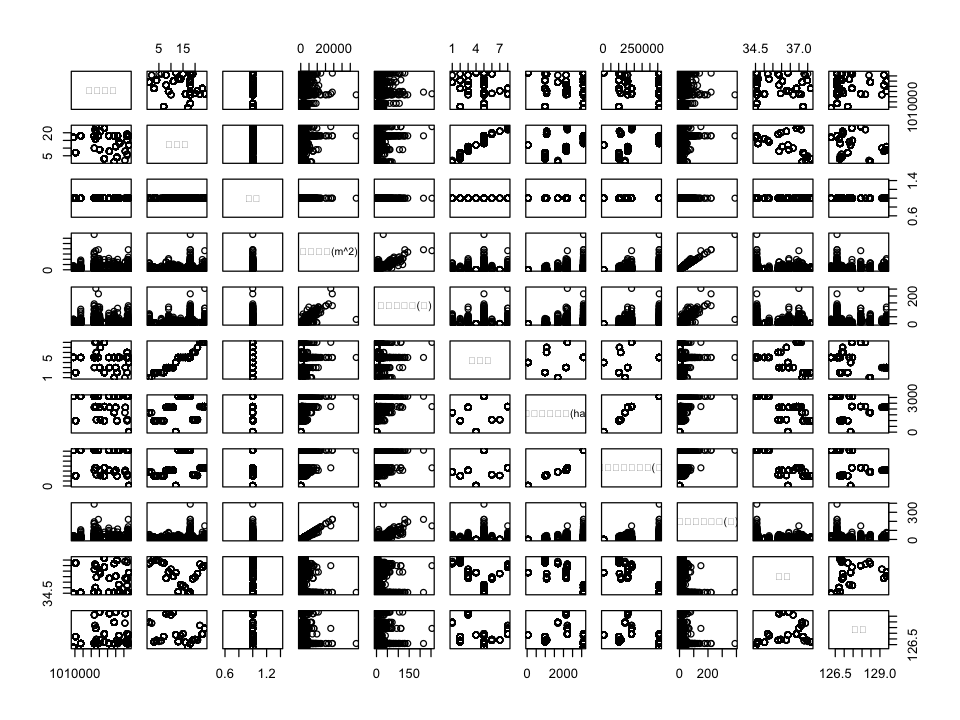

In [187]:
par(bg = 'white')
plot(소재지배추재배면적)

In [177]:
library(ggplot2)

In [188]:
#rfFunc(소재지배추재배면적[-c(1,2,3,6)],5,100,5)
secondTest<-소재지배추재배면적[-c(1,3,6)]
colnames(secondTest)<-c('소재지','재배면적','생산계획량','시도전체면적','시도전채생산량','소재지생산량','위도','경도')
secondTest

소재지,재배면적,생산계획량,시도전체면적,시도전채생산량,소재지생산량,위도,경도
<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
전라남도 진도군,578.0,5.08,3100,359598,6.7047627,34.48683,126.2634
전라남도 진도군,725.0,6.37,3100,359598,8.4099532,34.48683,126.2634
전라남도 진도군,1959.0,17.22,3100,359598,22.7242736,34.48683,126.2634
전라남도 진도군,204.0,1.79,3100,359598,2.3663868,34.48683,126.2634
전라남도 진도군,2354.0,20.69,3100,359598,27.3062481,34.48683,126.2634
전라남도 진도군,3127.7,27.49,3100,359598,36.2811182,34.48683,126.2634
전라남도 진도군,1015.0,8.92,3100,359598,11.7739345,34.48683,126.2634
전라남도 진도군,1470.0,12.92,3100,359598,17.0519052,34.48683,126.2634
전라남도 진도군,1530.0,13.45,3100,359598,17.7479013,34.48683,126.2634
